# PAOS

This notebook demonstrates the basic functionality of PAOS.

Select the desired example configuration desired below

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os, sys, time
from pathlib import Path

# Add to PYTHONPATH the path to local libraries
paospath = "~/git/PAOS"
if not os.path.expanduser(paospath) in sys.path:
    sys.path.append( os.path.expanduser(paospath) )

import paos

## Inputs

Define lens file to use

In [2]:
#OpticalPrescription = 'PAOS_Input_TEL_v04'
#OpticalPrescription = 'PAOS_Input_TEL_OGSE_v04'
#OpticalPrescription = 'PAOS_TEL_COM_CH0_v02'
OpticalPrescription = 'PAOS_Excite_TEL_v01'


OpticalPrescriptionFile = os.path.join(paospath, 'lens data', ''.join([OpticalPrescription, '.xlsx']))

In [3]:
# Parse lens file
pup_diameter, general, fields, opt_chain = paos.ParseConfig(OpticalPrescriptionFile)

## Ray tracing
Implement a full raytracing. For diagnostic purposes.

In [4]:
paos.raytrace(fields['0'], opt_chain)

S02 - Obstr           y:  0.000mm ut: 0.000e+00 rad x:  0.000mm us:  0.000 rad
S03 - M1              y:  0.000mm ut: 0.000e+00 rad x:  0.000mm us:  0.000 rad
S04 - M2              y:  0.000mm ut: 0.000e+00 rad x:  0.000mm us:  0.000 rad
S05 - Move to focus   y:  0.000mm ut: 0.000e+00 rad x:  0.000mm us:  0.000 rad
S06 - Slit            y:  0.000mm ut: 0.000e+00 rad x:  0.000mm us:  0.000 rad
S07 - IMAGE_PLANE     y:  0.000mm ut: 0.000e+00 rad x:  0.000mm us:  0.000 rad


## Physical optics propagation

Run the POP

In [5]:
start_time = time.time()
print('Start POP...')

retval = paos.run(pup_diameter, 1.0e-6 * general['wavelength'], general['grid size'], general['zoom'],
                 fields['0'], opt_chain)

end_time = time.time()
print('POP completed in {:6.1f}s'.format(end_time-start_time))

Start POP...
POP completed in    0.4s


## Plot results

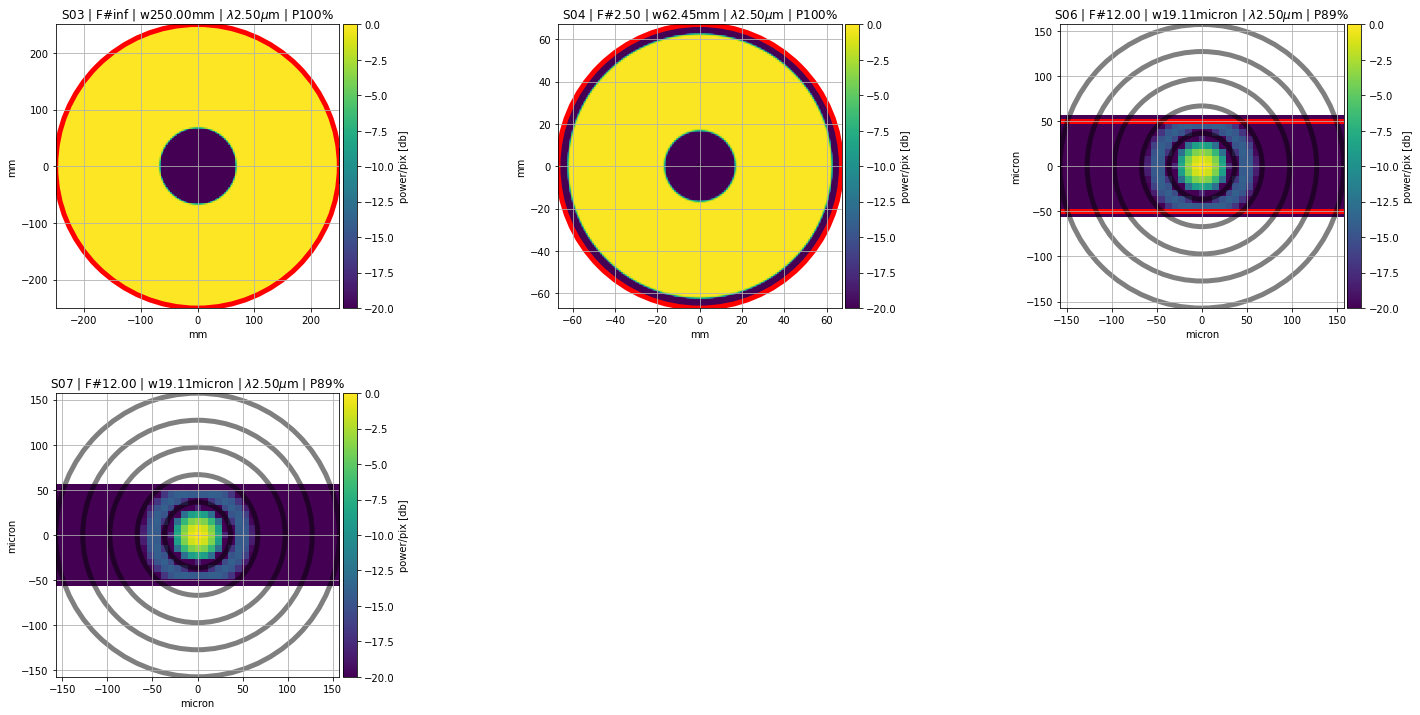

In [6]:
plots_dir = './plots'
Path(plots_dir).mkdir(parents=True, exist_ok=True)
figname = os.path.join(plots_dir, ''.join([OpticalPrescription, '_', str(1.0e-6 * general['wavelength']), '.png']))

paos.plot_pop(retval, ima_scale='log', ncols=3, figname=figname)